### AI Website  Analysis with Python
* Name:LI WAN
* Student Number:223718804
* E-mail:s223718804@deakin.edu.au
* Course:SIT731

---

### Introduction
The Artificial Intelligence (AI) Stack Exchange website serves as a hub for individuals interested in exploring and discussing topics related to artificial intelligence. With a vast repository of questions and answers, the platform fosters an active community of enthusiasts, professionals, and learners alike. To delve deeper into the dynamics of this community, we embarked on an analytical journey by harnessing data from various facets of the AI Stack Exchange ecosystem.

Upon acquiring datasets encompassing user profiles, post summaries, and engagement metrics, our objective was to unravel insights into the geographical distribution, occupations, post types, and thematic interests prevalent within the AI domain. Leveraging techniques such as regular expression parsing, keyword matching, and temporal analysis, we embarked on a comprehensive exploration of the data to glean meaningful observations.

### Data Wrangling
Firstly, we choose Artificial Intelligence: https://ai.stackexchange.com/ from StackExchange site, which has 12,000 questions and 12,000 answers. Secondly, we download the forms related to the user profile and post summary of the ai.stackexchange website, which consists of 8 xml files including "Badges", "Comments", "PostHistory", "PostLinks", "Posts", "Tags", "Users" and "Votes". Thirdly, we need to convert the xml files to CSV format and then read the contents of the csv file. Then, we will then analyze the data based on the specific data situation of each form to understand the ai domain, user characteristics and concerns, etc. In the following, we generate the csv file from the xml file.

In [334]:
import pandas as pd
import xml.etree.ElementTree as ET
import os

def convert_xml_to_csv(input_file, output_file):
    # Check if the input XML file exists
    if not os.path.exists(input_file):
        print(f"Error: The file {input_file} does not exist.")
        return
    
    # Parse XML file
    tree = ET.parse(input_file)
    root = tree.getroot()

    # Extract data from XML and create a DataFrame
    data = []
    for item in root.findall('.//row'):
        row_data = {}
        for attr in item.attrib:
            row_data[attr] = item.attrib[attr]
        data.append(row_data)

    # Create DataFrame
    df = pd.DataFrame(data)

    # Write DataFrame to CSV file
    df.to_csv(output_file, index=False)
    print(f"Conversion successful. Data saved to {output_file}")

# Example usage:
input_files = [
    "Badges.xml",
    "Comments.xml",
    "PostHistory.xml",
    "PostLinks.xml",
    "Posts.xml",
    "Tags.xml",
    "Users.xml",
    "Votes.xml"
]

output_path = r'C:\Users\Maxmelon\Downloads\ai.stackexchange.com'

for input_file in input_files:
    input_path = os.path.join(r'C:\Users\Maxmelon\Downloads\ai.stackexchange.com', input_file)
    output_file = os.path.join(output_path, os.path.splitext(input_file)[0] + ".csv")
    convert_xml_to_csv(input_path, output_file)


Conversion successful. Data saved to C:\Users\Maxmelon\Downloads\ai.stackexchange.com\Badges.csv
Conversion successful. Data saved to C:\Users\Maxmelon\Downloads\ai.stackexchange.com\Comments.csv
Conversion successful. Data saved to C:\Users\Maxmelon\Downloads\ai.stackexchange.com\PostHistory.csv
Conversion successful. Data saved to C:\Users\Maxmelon\Downloads\ai.stackexchange.com\PostLinks.csv
Conversion successful. Data saved to C:\Users\Maxmelon\Downloads\ai.stackexchange.com\Posts.csv
Conversion successful. Data saved to C:\Users\Maxmelon\Downloads\ai.stackexchange.com\Tags.csv
Conversion successful. Data saved to C:\Users\Maxmelon\Downloads\ai.stackexchange.com\Users.csv
Conversion successful. Data saved to C:\Users\Maxmelon\Downloads\ai.stackexchange.com\Votes.csv


In [335]:
# Provide the correct file path with the .csv extension
Badges = pd.read_csv(r'C:\Users\Maxmelon\Downloads\ai.stackexchange.com\Badges.csv')
Badges.head(3)

,Id,UserId,Name,Date,Class,TagBased
0,1,4,Informed,2016-08-02T15:38:29.913,3,False
1,2,9,Informed,2016-08-02T15:39:20.227,3,False
2,3,16,Informed,2016-08-02T15:39:28.290,3,False


Badges table includes Id, UserId, Name Date, Class, TagBased, we can know the user to get the situation of the badge, such as the time to get and the badge class such as Gold, Silver, Bronze.

In [336]:
# Provide the correct file path with the .csv extension
Comments = pd.read_csv(r'C:\Users\Maxmelon\Downloads\ai.stackexchange.com\Comments.csv')
Comments.head()

,Id,PostId,Score,Text,CreationDate,UserId,ContentLicense,UserDisplayName
0,9,22,1,I think the AI Box is actually a bad introduct...,2016-08-02T16:00:04.297,10.0,CC BY-SA 3.0,NaN
1,10,15,6,Definitely requires a statistical approach wit...,2016-08-02T16:01:10.020,38.0,CC BY-SA 3.0,NaN
2,11,22,0,Fair enough. I just happen to be more familia...,2016-08-02T16:04:37.090,33.0,CC BY-SA 3.0,NaN
3,14,41,1,If by IQ you mean pattern-finding (which is ge...,2016-08-02T16:14:28.373,47.0,CC BY-SA 3.0,NaN
4,24,45,0,"Regarding Asimov's laws, AFAIK, [the zeroth la...",2016-08-02T16:49:20.210,71.0,CC BY-SA 3.0,NaN


Comments table includes Id, PostId, Score, Text, CreationDate, UserId, ContentLicense, UserDisplayName, we can know the content of the comments, score, who rated it and when it was rated.

In [337]:
# Provide the correct file path with the .csv extension
PostHistory = pd.read_csv(r'C:\Users\Maxmelon\Downloads\ai.stackexchange.com\PostHistory.csv')
PostHistory.head(3)

,Id,PostHistoryTypeId,PostId,RevisionGUID,CreationDate,UserId,Text,ContentLicense,Comment,UserDisplayName
0,1,2,1,acd11026-43b5-4640-a6dd-dfff1749f5b5,2016-08-02T15:39:14.947,8.0,"What ""backprop"" does it mean? I've Googled it,...",CC BY-SA 3.0,NaN,NaN
1,2,1,1,acd11026-43b5-4640-a6dd-dfff1749f5b5,2016-08-02T15:39:14.947,8.0,"What is the ""backprop""?",CC BY-SA 3.0,NaN,NaN
2,3,3,1,acd11026-43b5-4640-a6dd-dfff1749f5b5,2016-08-02T15:39:14.947,8.0,<deep-network>,CC BY-SA 3.0,NaN,NaN


PostHistory table includes Id, PostHistoryTypeId, PostId, RevisionGUID, CreationDate, UserId, Text, ContentLicense, Comment, UserDisplayName, we can know the creation time of the Post, the type, the content and so on.

In [338]:
# Provide the correct file path with the .csv extension
PostLinks = pd.read_csv(r'C:\Users\Maxmelon\Downloads\ai.stackexchange.com\PostLinks.csv')
PostLinks.head(3)

,Id,CreationDate,PostId,RelatedPostId,LinkTypeId
0,103,2016-08-02T19:22:20.577,118,10,1
1,136,2016-08-02T21:18:16.763,140,36,1
2,179,2016-08-03T05:15:39.443,179,26,1


PostLinks table includes Id, CreationDate, PostId, RelatedPostId LinkTypeId, we can know the relationship between post and post.

In [339]:
# Provide the correct file path with the .csv extension
Posts = pd.read_csv(r'C:\Users\Maxmelon\Downloads\ai.stackexchange.com\Posts.csv')
Posts.head(3)

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,...,Tags,AnswerCount,CommentCount,ContentLicense,ParentId,ClosedDate,FavoriteCount,CommunityOwnedDate,LastEditorDisplayName,OwnerDisplayName
0,1,1,3.0,2016-08-02T15:39:14.947,11,819.0,"<p>What does ""backprop"" mean? Is the ""backprop...",8.0,2444.0,2019-11-16T17:56:22.093,...,<neural-networks><backpropagation><terminology...,5.0,0,CC BY-SA 4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,9.0,2016-08-02T15:40:20.623,14,1194.0,<p>Does increasing the noise in data help to i...,8.0,2444.0,2019-02-23T22:36:19.090,...,<neural-networks><machine-learning><statistica...,3.0,0,CC BY-SA 4.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2,NaN,2016-08-02T15:40:24.820,15,NaN,"<p>""Backprop"" is the same as ""backpropagation""...",4.0,NaN,NaN,...,NaN,NaN,0,CC BY-SA 3.0,1.0,NaN,NaN,NaN,NaN,NaN


Posts table includes Id, PostTypeId, AcceptedAnswerId, CreationDate Score, ViewCount, Body, OwnerUserId, LastEditorUserId, LastEditDate, Tags, AnswerCount, CommentCount, ContentLicense, ParentId, ClosedDate, FavoriteCount, CommunityOwnedDate,LastEditorDisplayName, OwnerDisplayName, LastEditorDisplayName, OwnerDisplayName, we can know the content of the post, creation time, score, number of views, number of answers, number of ratings, tag content.

In [340]:
# Provide the correct file path with the .csv extension
Tags = pd.read_csv(r'C:\Users\Maxmelon\Downloads\ai.stackexchange.com\Tags.csv')
Tags.head(3)

,Id,TagName,Count,ExcerptPostId,WikiPostId
0,2,generalization,34,17536.0,17535.0
1,4,neurons,26,6022.0,6021.0
2,8,intelligent-agent,66,1765.0,1764.0


Tags table includes Id, TagName, Count, ExcerptPostId, WikiPostId, we can know the name of the tag and the number.

In [341]:
# Provide the correct file path with the .csv extension
Users = pd.read_csv(r'C:\Users\Maxmelon\Downloads\ai.stackexchange.com\Users.csv')
Users.head(3)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,WebsiteUrl
0,-1,1,2016-08-02T00:14:10.580,Community,2016-08-02T00:14:10.580,on the server farm,"<p>Hi, I'm not really a person.</p>\r\n<p>I'm ...",193,1490,1954,-1.0,NaN
1,1,101,2016-08-02T15:36:45.333,Adam Lear,2023-11-20T23:00:38.940,"New York, NY",\n<p>Developer at Stack Overflow focusing on p...,208,0,0,37099.0,NaN
2,2,101,2016-08-02T15:36:48.397,Nick Craver,2016-11-30T22:09:22.300,"Winston-Salem, NC",<p>I am a Principal Software Engineer at Micro...,11,0,0,7598.0,https://nickcraver.com/blog/


Users table includes Id, Reputation, CreationDate, DisplayName, LastAccessDate, Location, AboutMe Views, UpVotes, DownVotes, AccountId, WebsiteUrl, we can know the user's profile, including the user's location, self-introduction, creation time and so on.

In [342]:
# Provide the correct file path with the .csv extension
Votes = pd.read_csv(r'C:\Users\Maxmelon\Downloads\ai.stackexchange.com\Votes.csv')
Votes.head(3)

,Id,PostId,VoteTypeId,CreationDate,UserId,BountyAmount
0,1,1,2,2016-08-02T00:00:00.000,NaN,NaN
1,2,1,2,2016-08-02T00:00:00.000,NaN,NaN
2,3,1,2,2016-08-02T00:00:00.000,NaN,NaN


Votes table includes Id, PostId, VoteTypeId, CreationDate, UserId, BountyAmount, we can know the creator, vote type, creation time and so on.  
We have a general understanding of the eight tables on the site's users and postings, and below we will analyze whether the types of postings have changed over time, the characteristics of the geographic distribution of users, the approximate occupations of users, the frequency of the occurrence of some keywords in the user's postings, and the changes in the post tags over the years

### Data Analysis and Visualization

Firstly we want to know the geographical distribution of the users, we will find out the country information by regular expression through the Location field of the Users table and then draw a map to represent the distribution of the users.

In [343]:
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import numpy as np
import re

In [354]:
# Drop rows where Location is NaN
Users_cleaned = Users.dropna(subset=['Location']).copy()

# Create 'Country' column in Users
Users_cleaned['Country'] = Users_cleaned['Location'].apply(
    lambda x: re.findall(r'[^,]+$', str(x).strip())[0].strip() if ',' in str(x) and re.findall(r'[^,]+$', str(x).strip()) else str(x).strip() if str(x).strip() else None
)

# Drop rows where 'Country' is None
Users_country = Users_cleaned.dropna(subset=['Country'])

# Keep only required columns
Users_country = Users_country[['AccountId', 'Location', 'Country']]

# Print the shape and first 10 rows of the DataFrame
print(Users_country.shape)
Users_country.head(10)


(26864, 3)


,AccountId,Location,Country
0,-1.0,on the server farm,on the server farm
1,37099.0,"New York, NY",NY
2,7598.0,"Winston-Salem, NC",NC
3,2.0,"Corvallis, OR, United States",United States
5,8057826.0,"Mankato, MN, United States",United States
6,3393940.0,"Philadelphia, PA",PA
7,6824864.0,"Plymouth, United Kingdom",United Kingdom
8,22370.0,"London, UK",UK
9,7263447.0,United Kingdon,United Kingdon
10,555192.0,"Berkeley, CA",CA


In [355]:
# Replace country names before counting
Users_country['Country'] = Users_country['Country'].replace({'USA': 'UNITED STATES', 'UNITED STATES': 'UNITED STATES',
                                                             'UK': 'UNITED KINGDOM', 'UNITED KINGDOM': 'UNITED KINGDOM'})
# Calculate the number of users for each country
country_counts = Users_country['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'UserCount']

# Sort the country_counts DataFrame in descending order based on the 'UserCount' column
country_counts_sorted = country_counts.sort_values(by='UserCount', ascending=False)

# Print the result
country_counts.head(10)

,Country,UserCount
0,India,4012
1,UNITED STATES,2089
2,United States,1631
3,Germany,1088
4,Canada,807
5,France,660
6,United Kingdom,627
7,UNITED KINGDOM,549
8,Australia,468
9,Pakistan,353


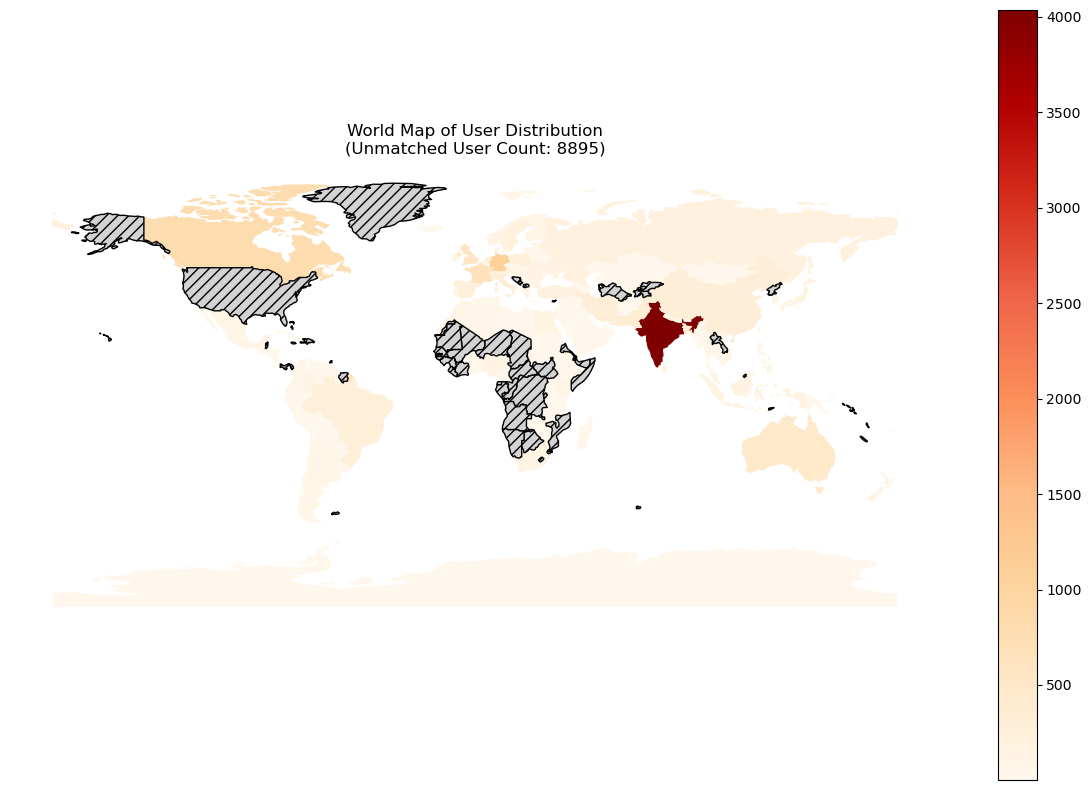

In [356]:
import geopandas as gpd
# Read world map data
world = gpd.read_file('C:/Users/Maxmelon/Downloads/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Merge data based on country names
world_users = world.merge(Users_distribution, left_on='NAME', right_on='Country', how='left')

# Calculate the count of unmatched users
unmatched_users = Users_distribution[~Users_distribution['Country'].isin(world_users['NAME'])]
unmatched_count = unmatched_users['UserCount'].sum() if not unmatched_users.empty else 0

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_users.plot(column='UserCount', cmap='OrRd', legend=True, ax=ax, missing_kwds={
    "color": "lightgrey",
    "edgecolor": "black",
    "hatch": "///",
    "label": "Missing values",
})

ax.set_axis_off()
ax.set_title(f'World Map of User Distribution\n(Unmatched User Count: {unmatched_count})')
plt.show()


From the above graph we see that very many users are from India, USA followed by other countries like UK, Germany, Canada etc.  
We also want to know the occupation of the users, in About me, there are many users mentioned their occupation, so we will match some keywords on the content of About me, mainly Developer, Programmer, student, etc., we can see whether the users who follow this website have any occupation experience or not.

In [357]:
# Drop rows with NaN values in the AboutMe column
Users_statement = Users.dropna(subset=['AboutMe']).copy()

# Use regular expression to extract the sentence containing "I am" or "I'm" up to the nearest period
Users_statement['I_am_statement'] = Users_statement['AboutMe'].str.extract(r'((I am|I\'m).*?\.).*', flags=re.IGNORECASE)[0]

# Drop rows where I_am_statement is NaN
Users_statement = Users_statement.dropna(subset=['I_am_statement']).copy()

# Print the extracted results
print(Users_statement.shape)
Users_statement[['AboutMe', 'I_am_statement']].head()

(3913, 13)


,AboutMe,I_am_statement
0,"<p>Hi, I'm not really a person.</p>\r\n<p>I'm ...",I'm not really a person.
2,<p>I am a Principal Software Engineer at Micro...,I am a Principal Software Engineer at Microsof...
8,"<p>I'm a DevOps guy, also IT engineer programm...","I'm a DevOps guy, also IT engineer programming..."
13,<p>I am a undergraduate computer engineering s...,I am a undergraduate computer engineering stud...
15,"<p>I'm John Slegers, full stack web developer ...","I'm John Slegers, full stack web developer fro..."


In [358]:
# Function to extract career information based on specified conditions
def extract_career(statement):
    # Case 1: Engineer
    match_engineer = re.search(r'\b(\w+)\s+Engineer\b', statement, flags=re.IGNORECASE)
    if match_engineer:
        return 'Engineer'

    # Case 2: Developer
    match_developer = re.search(r'\b(\w+)\s+Developer\b', statement, flags=re.IGNORECASE)
    if match_developer:
        return 'Developer'

    # Case 3: Student (including undergraduate, student, postgraduate, phd)
    match_student = re.search(r'\b(?:undergraduate|student|postgraduate|Phd)\b', statement, flags=re.IGNORECASE)
    if match_student:
        return 'Student'
    
    # Case 4: Graduate
    match_graduate = re.search(r'\b(?:graduate)\b', statement, flags=re.IGNORECASE)
    if match_graduate:
        return 'Graduate'
    
    # Case 5: Manager
    match_manager = re.search(r'\b(\w+)\s+Manager\b', statement, flags=re.IGNORECASE)
    if match_manager:
        return 'Manager'
    
    # Case 6: Scientist
    match_scientist = re.search(r'\b(\w+)\s+Scientist\b', statement, flags=re.IGNORECASE)
    if match_scientist:
        return 'Scientist'
    
    # Case 7: Programmer
    match_programmer = re.search(r'\b(\w+)\s+Programmer\b', statement, flags=re.IGNORECASE)
    if match_programmer:
        return 'Programmer'

    # If none of the specified conditions match, return None
    return None

# Apply the function to create the 'Career' column
Users_statement['Career'] = Users_statement['I_am_statement'].apply(extract_career)

# Print the updated results
Users_statement[['AboutMe', 'I_am_statement', 'Career']].head(20)

,AboutMe,I_am_statement,Career
0,"<p>Hi, I'm not really a person.</p>\r\n<p>I'm ...",I'm not really a person.,None
2,<p>I am a Principal Software Engineer at Micro...,I am a Principal Software Engineer at Microsof...,Engineer
8,"<p>I'm a DevOps guy, also IT engineer programm...","I'm a DevOps guy, also IT engineer programming...",Engineer
13,<p>I am a undergraduate computer engineering s...,I am a undergraduate computer engineering stud...,Student
15,"<p>I'm John Slegers, full stack web developer ...","I'm John Slegers, full stack web developer fro...",Developer
20,<p><strong>BY DAY:</strong> Jack of all trades...,"I am the main software person, so I need to ha...",None
23,"<p>developer, techie, nerd.... ex-DBRE at Stac...","I'm not at my desk, I do CrossFit and run (a l...",None
24,"<p>Former <a href=""https://stackoverflow.blog/...",I am a C# ASP.,None
25,<p>I am an undergrad from India with great int...,I am an undergrad from India with great intere...,None
28,<p>I am a Dutch amateur mathematician currentl...,I am a Dutch amateur mathematician currently i...,None


In [359]:
# Calculate the count of 'None' in the 'Career' column
none_count = Users_statement['Career'].isna().sum()

# Display the count
print(f'Count of "None" in Career: {none_count}')

Count of "None" in Career: 2305


In [360]:
# Remove rows with 'None' values in the 'Career' column
Users_statement_filtered = Users_statement[Users_statement['Career'].notna()].copy()

# Create a new column 'CareerCategory' based on the specified criteria
Users_statement_filtered['CareerCategory'] = Users_statement_filtered['Career'].apply(
    lambda career: 'With Work Experience' if career in ['Engineer', 'Developer', 'Manager', 'Scientist', 'Programmer']
    else 'No Work Experience' if career in ['Student', 'Graduate']
    else None  # You can adjust this based on your specific criteria
)

# Create a DataFrame with career counts and CareerCategory
career_counts = Users_statement_filtered.groupby(['CareerCategory', 'Career']).size().reset_index(name='Count')

# Sort the DataFrame by 'Count' column in descending order
career_counts = career_counts.sort_values(by='Count', ascending=False)
career_counts.head(10)

,CareerCategory,Career,Count
1,No Work Experience,Student,488
2,With Work Experience,Developer,451
3,With Work Experience,Engineer,400
6,With Work Experience,Scientist,109
5,With Work Experience,Programmer,106
0,No Work Experience,Graduate,33
4,With Work Experience,Manager,21


In [361]:
import pandas as pd
from squarify import normalize_sizes, squarify
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap
from bokeh.io import output_notebook

output_notebook()
data = career_counts[["CareerCategory", "Career", "Count"]]

category = ("With Work Experience", "No Work Experience")

count_by_career = data.groupby(["CareerCategory", "Career"]).sum("Count")
count_by_career = count_by_career.sort_values(by="Count").reset_index()

count_by_category = count_by_career.groupby("CareerCategory").sum("Count").sort_values(by="Count")

def treemap(df, col, x, y, dx, dy, *, N=100):
    sub_df = df.nlargest(N, col)
    normed = normalize_sizes(sub_df[col], dx, dy)
    blocks = squarify(normed, x, y, dx, dy)
    blocks_df = pd.DataFrame.from_dict(blocks).set_index(sub_df.index)
    return sub_df.join(blocks_df, how='left').reset_index()

x, y, w, h = 0, 0, 600, 400

blocks_by_category = treemap(count_by_category, "Count", x, y, w, h)

dfs = []
for index, (CareerCategory, Count, x, y, dx, dy) in blocks_by_category.iterrows():
    df =count_by_career[count_by_career.CareerCategory==CareerCategory]
    dfs.append(treemap(df, "Count", x, y, dx, dy, N=10))
blocks = pd.concat(dfs)

p = figure(width=w, height=h, tooltips="@Career", toolbar_location=None,
           x_axis_location=None, y_axis_location=None)
p.x_range.range_padding = p.y_range.range_padding = 0
p.grid.grid_line_color = None

p.block('x', 'y', 'dx', 'dy', source=blocks, line_width=1, line_color="white",
        fill_alpha=0.8, fill_color=factor_cmap("CareerCategory", "MediumContrast4", category))

p.text('x', 'y', x_offset=2, text="CareerCategory", source=blocks_by_category,
       text_font_size="14pt", text_color="white")

blocks["ytop"] = blocks.y + blocks.dy
p.text('x', 'ytop', x_offset=2, y_offset=2, text="Career", source=blocks,
       text_font_size="10pt", text_baseline="top",
       text_color=factor_cmap("CareerCategory", ("black", "white", "black", "white"), category))

show(p)

Loading BokehJS ...

From the above chart, we can see that the people who follow this website are more people with work experience, mostly program developers, less administrators, and most of the students are school students.  
Below we want to understand how post types have changed over the years.

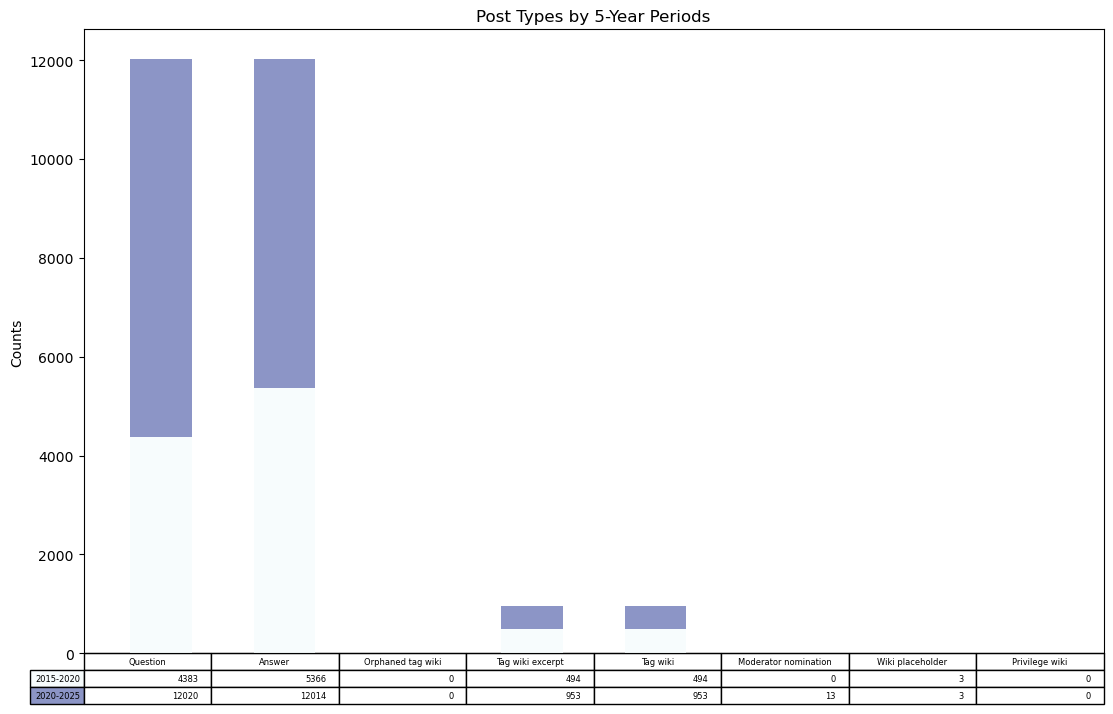

In [362]:
#Table Demo
# Ensure CreationDate is of datetime type
Posts['CreationDate'] = pd.to_datetime(Posts['CreationDate'])

# Set start and end years
start_year = 2015
end_year = Posts['CreationDate'].dt.year.max()

# Time periods every five years
time_periods = range(start_year, end_year, 5)

# Calculate counts of each type of post for each time period
post_counts = {ptype: [] for ptype in range(1, 9)}  # Post types from 1 to 8

for period_start in time_periods:
    period_end = period_start + 5
    period_posts = Posts[(Posts['CreationDate'].dt.year >= period_start) & (Posts['CreationDate'].dt.year < period_end)]
    for ptype in post_counts.keys():
        count = period_posts[period_posts['PostTypeId'] == ptype].shape[0]
        post_counts[ptype].append(count)

# Prepare data for plotting
columns = ('Question', 'Answer', 'Orphaned tag wiki', 'Tag wiki excerpt', 'Tag wiki',
           'Moderator nomination', 'Wiki placeholder', 'Privilege wiki')
rows = [f"{start}-{start + 5}" for start in time_periods]

data = np.array([post_counts[ptype] for ptype in range(1, 9)]).T

# Plot stacked bar chart and table
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
y_offset = np.zeros(len(columns))

# Plot bars and add text to table
cell_text = []
for row in range(len(data)):
    ax.bar(columns, data[row], 0.5, bottom=y_offset, color=colors[row])
    y_offset += data[row]
    cell_text.append([f"{int(x)}" for x in y_offset])

# Add table
the_table = ax.table(cellText=cell_text, rowLabels=rows, rowColours=colors, colLabels=columns, loc='bottom')

# Adjust layout to fit the table
plt.subplots_adjust(left=0.05, bottom=0.1)
ax.set_ylabel('Counts')
ax.set_title('Post Types by 5-Year Periods')
ax.set_xticks([])
plt.show()


From the chart above, we can see that posts are mainly distributed in Questions and Answers, and 2020-present has seen a huge increase in the number of posts, with Questions increasing by a factor of 2, Answers by a factor of 1.5, Tag Wiki excpert and Tag wiki have been only a small number of posts, and other types of posts.   
We wanted to know in how many posts the hotter keywords in AI such as Artificial Intelligence, Natural Language Processing, Python have appeared. Then we can draw word cloud.

In [363]:
# Drop rows containing missing values
Posts_cleaned = Posts.dropna(subset=['Body', 'Score'])

# Define keywords
keywords = ['Artificial Intelligence', 'AI', 'Python', 'Java', 'NLP', 'Natural Language Processing']
keyword_counts = {}

# Count occurrences and total score for each keyword
for keyword in keywords:
    Posts_hotwords = Posts_cleaned[Posts_cleaned['Body'].str.contains(keyword, case=False)]
    keyword_counts[keyword] = {'Count': len(Posts_hotwords), 'Total Score': Posts_hotwords['Score'].sum()}

# Create DataFrame
df = pd.DataFrame(keyword_counts).T
df.index.name = 'Keyword'

# Sort by Total Score in descending order
df_sorted = df.sort_values(by='Total Score', ascending=False)

# Print the table
print(df_sorted)

                             Count  Total Score
Keyword                                        
AI                           18821        44514
Artificial Intelligence        837         3213
Python                         893         2091
NLP                            485         1354
Natural Language Processing    181          660
Java                           141          401


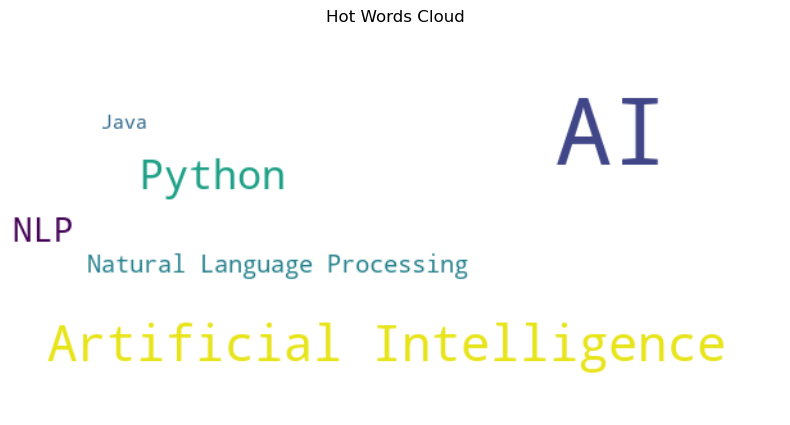

In [364]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert DataFrame to dictionary for WordCloud
keyword_scores = df_sorted['Total Score'].to_dict()

# Create WordCloud object
wordcloud = WordCloud(width=600, height=300, background_color ='white').generate_from_frequencies(keyword_scores)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hot Words Cloud')
plt.show()

In AI Q&A website, people always mention AI, and Python is even hotter than NLP and Java.  
Below we will analyze how Tag's themes have changed over the years.

In [365]:
from collections import Counter
import pandas as pd

# Extracting years
Posts['Year'] = Posts['CreationDate'].dt.year

# Initialize a list to store tags for all years
all_tags = []

# Iterate over all posts' tag lists
for tags_list in Posts['Tags'].str.findall(r'<(.*?)>'):
    if isinstance(tags_list, list):
        all_tags.extend(tags_list)

# Count total occurrences of all tags
total_tag_counts = Counter(all_tags)

# Find top 10 tags by occurrences
top_10_tags = [tag for tag, _ in total_tag_counts.most_common(10)]#Set Top 

# Initialize a dictionary to store tag counts for each year
tag_counts_by_year = {}

# Iterate over each year
for year in Posts['Year'].unique():
    # Filter posts for the current year
    posts_for_year = Posts[Posts['Year'] == year]
    
    # Store all tags for the current year
    all_tags_for_year = []
    
    # Iterate over tag lists for each post in the current year
    for tags_list in posts_for_year['Tags'].str.findall(r'<(.*?)>'):
        if isinstance(tags_list, list):
            all_tags_for_year.extend(tags_list)
    
    # Count occurrences of each tag for the current year
    year_tag_counts = Counter(all_tags_for_year)

    # Create "Others" category
    other_tags_count = sum(count for tag, count in year_tag_counts.items() if tag not in top_10_tags)

    # Update dictionary with top 10 tags and "Others" category
    tag_counts_by_year[year] = {tag: (year_tag_counts[tag] if tag in top_10_tags else 0) for tag in total_tag_counts}
    tag_counts_by_year[year]['Others'] = other_tags_count

# Convert to DataFrame
df_by_year = pd.DataFrame(tag_counts_by_year).fillna(0).astype(int)

# Keep columns for top 10 tags and "Others" category
df_by_year = df_by_year.loc[top_10_tags + ['Others']]

# Print DataFrame
print(df_by_year.shape)
df_by_year.head(11)

(11, 8)


,2016,2017,2018,2019,2020,2021,2022,2023
neural-networks,93,170,349,528,527,353,243,279
reinforcement-learning,15,51,188,440,732,366,325,262
machine-learning,43,163,293,509,478,285,254,273
deep-learning,31,83,189,417,467,307,228,257
convolutional-neural-networks,21,45,129,267,277,188,116,118
natural-language-processing,25,46,62,118,156,110,84,137
computer-vision,7,20,49,84,124,84,61,104
deep-rl,3,4,22,58,130,106,99,81
classification,11,33,48,97,108,56,64,63
training,5,27,54,79,112,71,50,76


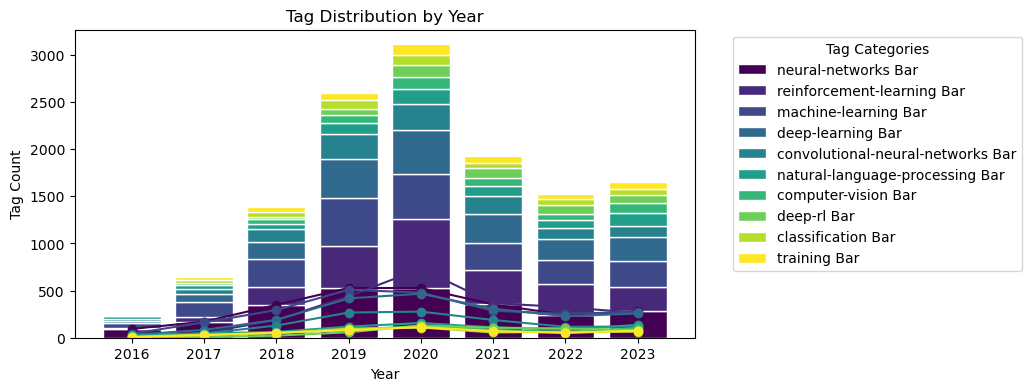

In [366]:
def bar_label_demo(df):
    if 'Others' in df.index:
        df = df.drop('Others')#If show others the bar label demo will not look good. 

    categories = df.index
    years = df.columns

    data = np.array(df)
    data_cum = np.cumsum(data, axis=0)

    colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

    # Decrease the size of the plot
    fig, ax = plt.subplots(figsize=(8, 4))

    for i, (category, color) in enumerate(zip(categories, colors)):
        starts = data_cum[i] - data[i]
        bars = ax.bar(years, data[i], bottom=starts, color=color, edgecolor='white', label=f'{category} Bar')

        # Add line plots
        ax.plot(years, data[i], marker='o', color=color)

    ax.set_xlabel('Year')
    ax.set_ylabel('Tag Count')
    ax.legend(title='Tag Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('Tag Distribution by Year')

    return fig, ax

bar_label_demo(df_by_year)
plt.show()

From the above figure, we can see that people are most interested in neural-networks all the time, followed by reinforcement-learning, machine-learning, and deep-learning, with reinforcement-learning becoming very hot in 2020, but gradually declining after 2021.

### Conclusion

Our analysis of the AI Stack Exchange data revealed intriguing insights into the vibrant community that surrounds the platform. Geographically, the majority of users hail from regions such as India and the USA, underscoring the global reach and appeal of AI-related discussions. Occupationally, a significant proportion of users identify as developers or programmers, reflecting a cohort deeply entrenched in the technical aspects of AI.

Examining post types over time elucidated a surge in activity, particularly in questions and answers, signaling a growing engagement within the community. Moreover, our investigation into keyword mentions showcased the prominence of AI-related terms such as Artificial Intelligence and Python, indicative of the prevalent interests among users.

Finally, analyzing the evolution of tag themes underscored perennial interests in neural networks, machine learning, and deep learning, with fluctuations observed in topics like reinforcement learning.

In summation, our study provides valuable insights into the AI Stack Exchange ecosystem, shedding light on the diverse interests, occupations, and trends shaping discussions within the AI community.

### Reference
Archive.org. (n.d.). Stack Exchange Data Dump - March 2020. Retrieved from https://archive.org/download/stackexchange

Gagolewski, M. (2020). Minimalist Data Wrangling with Python.

Matplotlib. (n.d.). Matplotlib Gallery. Retrieved from https://matplotlib.org/stable/gallery/index